In [44]:
import gymnasium as gym
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from tqdm import tqdm
import imageio

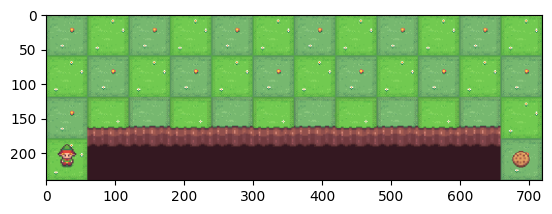

In [6]:
'''Make environment
- render_mode
    - 'human': open a live window (not interactive)
    - 'rgb_array': display an rgb image, can be rendered using plt.imshow(env.render())
'''
env = gym.make('CliffWalking-v0', render_mode = 'rgb_array')
env.reset()
rgb_array = env.render()
plt.imshow(rgb_array)

In [10]:
print(f"_____STUDY THE ENVIRONMENT_____")
n_states = env.observation_space.n
print(f"Total number of observations: {n_states}")
print(f"Sample an observation from the observation space: {env.observation_space.sample()}")
n_actions = env.action_space.n
print(f"Total number of actions: {n_actions}")
print(f"Sample an action from the action space: {env.action_space.sample()}")

_____STUDY THE ENVIRONMENT_____
Total number of observations: 48
Sample an observation from the observation space: 15
Total number of actions: 4
Sample an action from the action space: 2


In [22]:
def init_qtable (n_states, n_actions):
    return np.zeros((n_states, n_actions))

In [12]:
def greedy_policy (qtable, state):
    action = np.argmax(qtable[state, :])
    return action

In [40]:
def epsilon_greedy_policy (qtable, state, epsilon=0.1):
    if (np.random.rand() > epsilon):
        action = greedy_policy(qtable, state)
    else:
        action = env.action_space.sample()
    return action

<img src=qlearning_algo.png width=800, height=350>

In [52]:
def train (env, n_episodes=1000, epsilon=0.01, lr=0.001):
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    qtable = init_qtable(n_states, n_actions)

    for episode in tqdm(range(n_episodes)):
        state, info = env.reset()
        while True:
            action = epsilon_greedy_policy(qtable, state, epsilon)
            new_state, reward, terminated, truncated, info = env.step(action)

            # update qtable
            qtable[state, action] = qtable[state,action] + lr * (reward + np.max(qtable[state, :] - qtable[state, action]))

            state = new_state
            if (terminated): break
    return qtable


In [53]:
learned_qtable = train(env)

100%|██████████| 1000/1000 [00:09<00:00, 100.61it/s]


[[-5.20895263 -5.20899847 -5.20897802 -5.20896727]
 [-4.97795951 -4.97797614 -4.97698489 -4.97699965]
 [-4.63598793 -4.63698103 -4.63695956 -4.63599946]
 [-4.25499961 -4.25598994 -4.25597798 -4.25595764]
 [-3.86798595 -3.86796258 -3.86799974 -3.86799383]
 [-3.48399289 -3.4849772  -3.48399982 -3.48498206]
 [-3.10999296 -3.10999982 -3.11097422 -3.11098209]
 [-2.74898702 -2.74899596 -2.74897721 -2.74799985]
 [-2.40299697 -2.40398508 -2.40299202 -2.40299994]
 [-2.08198605 -2.08199988 -2.08199398 -2.08199301]
 [-1.80597918 -1.805992   -1.8059999  -1.80599395]
 [-1.62599003 -1.625993   -1.62599598 -1.62599995]
 [-5.44095853 -5.43897509 -5.43898186 -5.43899956]
 [-5.08698482 -5.08797416 -5.08796149 -5.08699945]
 [-4.67597604 -4.6759997  -4.67596257 -4.67598388]
 [-4.26299974 -4.26398894 -4.26397032 -4.26398208]
 [-3.86297034 -3.8629879  -3.86199984 -3.86297912]
 [-3.47498014 -3.47499097 -3.47399193 -3.47399987]
 [-3.09897523 -3.09799191 -3.09898695 -3.09799972]
 [-2.73299791 -2.73298111 -2.73

<Axes: >

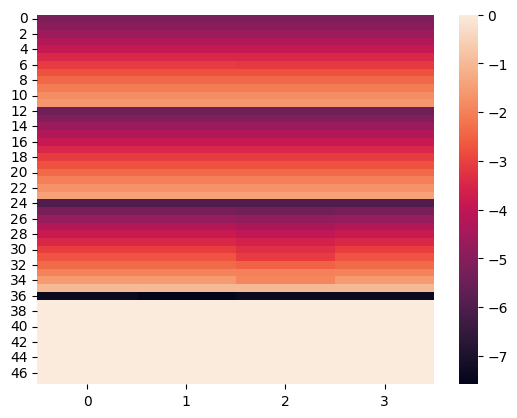

In [54]:
print(learned_qtable)
sns.heatmap(learned_qtable)